In [27]:
# import libraries
import os
from pathlib import Path
import pandas as pd
import urllib
import json
import zipfile
from zipfile import ZipFile
from openpyxl import Workbook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [28]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

In [29]:
# assign path to data folder
data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

# file name to download
file = "OpenDataDC_Taxi_2019.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# opening ZIP file in read mode
with zipfile.ZipFile(fullfilename, "r") as file:

    # extract all files inside the ZIP file
    file.extractall(data_path)

['taxi_2019_06.txt', 'taxi_2019_01.txt', 'taxi_2019_02.txt', 'taxi_2019_03.txt', 'taxi_2019_04.txt', 'taxi_2019_05.txt', 'README_DC_Taxicab_trip.txt', 'taxi_2019_07.csv', 'taxi_2019_08.csv', 'taxi_2019_09.csv', 'taxi_2019_10.csv', 'taxi_2019_11.csv', 'taxi_2019_12.csv']


In [ ]:
# convert txt files to csv (download folder contains both txt and csv files)
## data types indicated to improve performance
import fnmatch

data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"
files = os.listdir(data_path)

for file in files:
    if fnmatch.fnmatch(file, "taxi*"):
        extension = os.path.splitext(file)[1]
        if extension == ".txt":
            filename = os.path.join(data_path, file)
            df = pd.read_csv(
                filename,
                sep="|",
                dtype={
                    "OBJECTID": int,
                    "FAREAMOUNT": float,
                    "ORIGINZIP": object,
                    "DESTINATIONZIP": object,
                    "MILEAGE": float,
                    "DURATION": int,
                    "ORIGIN_BLOCK_LATITUDE": float,
                    "ORIGIN_BLOCK_LONGITUDE": float,
                    "ORIGINDATETIME_TR": object,
                    "DESTINATIONDATETIME_TR": object,
                }
            )
            new_filename = os.path.splitext(filename)[0] + ".csv"
            df.to_csv(new_filename, index=False)

In [31]:
# load monthly files into a single df and visualize process using glob library
## data types indicated to improve performance and columns selected to consolidate df
import glob

all_dfs = []
for one_filename in glob.glob(
    r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv"
):
    print(f"Loading {one_filename}")
    new_df = pd.read_csv(
        one_filename,
        dtype={
            "OBJECTID": int,
            "FAREAMOUNT": float,
            "ORIGINZIP": object,
            "DESTINATIONZIP": object,
            "MILEAGE": float,
            "DURATION": int,
            "ORIGIN_BLOCK_LATITUDE": float,
            "ORIGIN_BLOCK_LONGITUDE": float,
            "ORIGINDATETIME_TR": object,
            "DESTINATIONDATETIME_TR": object,
        },
        usecols=[
            "OBJECTID",
            "ORIGINDATETIME_TR",
            "DESTINATIONDATETIME_TR",
            "ORIGINZIP",
            "DESTINATIONZIP",
            "MILEAGE",
            "DURATION",
            "FAREAMOUNT",
            "ORIGIN_BLOCK_LATITUDE",
            "ORIGIN_BLOCK_LONGITUDE",
            "ORIGINZIP"
        ]
    )
    all_dfs.append(new_df)

len(all_dfs)

Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_01.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_02.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_03.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_04.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_05.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_06.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Doc

12

In [32]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 8,652,721
columns: 10


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,48252809,15.94,20006,22202,5.19,879,38.900213,-77.040574,01/01/2019 15:00,01/01/2019 15:00
1,48252810,73.45,20007,20152,31.43,2735,38.907217,-77.063241,01/01/2019 15:00,01/01/2019 16:00
2,48252811,6.49,20037,20007,1.23,363,38.909637,-77.047716,01/01/2019 15:00,01/01/2019 15:00
3,48252812,17.29,20009,22202,6.13,946,38.920843,-77.031850,01/01/2019 15:00,01/01/2019 15:00
4,48252813,45.37,-,22202,0.00,0,NaN,NaN,01/01/2019 15:00,01/01/2019 15:00
...,...,...,...,...,...,...,...,...,...,...
574395,574396,13.78,20002,20011,5.25,0,38.911114,-77.005668,12/31/2019 23:00,12/31/2019 20:00
574396,574397,12.70,20782,20011,4.30,0,NaN,NaN,12/31/2019 23:00,12/31/2019 17:00
574397,574398,8.38,-,-,3.13,0,38.931227,-77.013912,12/31/2019 23:00,12/31/2019 23:00
574398,574399,6.76,-,-,0.41,0,38.879633,-77.024955,12/31/2019 23:00,12/31/2019 23:00


In [33]:
# convert pickup timestamp to datetime column and add month column
taxi_trips['pickup_dt'] = pd.to_datetime(taxi_trips['ORIGINDATETIME_TR']) 
taxi_trips['month'] = pd.DatetimeIndex(taxi_trips['pickup_dt']).month 

taxi_trips.dtypes

OBJECTID                           int64
FAREAMOUNT                       float64
ORIGINZIP                         object
DESTINATIONZIP                    object
MILEAGE                          float64
DURATION                           int64
ORIGIN_BLOCK_LATITUDE            float64
ORIGIN_BLOCK_LONGITUDE           float64
ORIGINDATETIME_TR                 object
DESTINATIONDATETIME_TR            object
pickup_dt                 datetime64[ns]
month                              int32
dtype: object

In [34]:
# group by month
trips_monthly = (
    taxi_trips
    .groupby('month')[['OBJECTID']]
    .count()
    .rename(columns={'OBJECTID': 'count'})
    .reset_index()
)

trips_monthly.head()

,month,count
0,1,589475
1,2,667546
2,3,902382
3,4,853950
4,5,865374


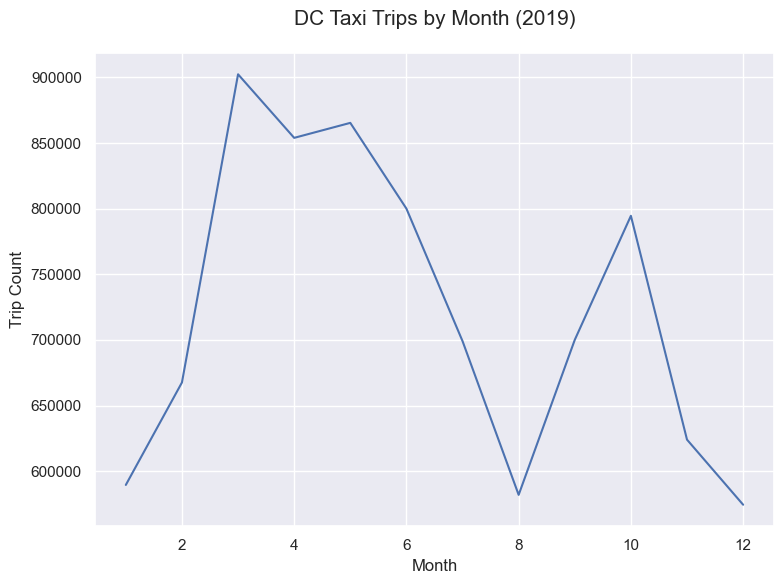

In [35]:
# plot monthly trip counts
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(8, 6))

trips_monthly.plot(
    x='month', 
    y='count', 
    legend=False, 
    ax=ax
).set_title(
    'DC Taxi Trips by Month (2019)',
    pad=20, fontsize=15)


plt.xlabel('Month', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

plt.tight_layout()

In [36]:
# transform pickup timestamp column for temporal analysis
## convert UTC date time column to local time zone
## extract hour, weekday name, and weekday number in local time zone
taxi_trips['pickup_est'] = taxi_trips['pickup_dt'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
taxi_trips['hour'] = pd.DatetimeIndex(taxi_trips['pickup_est']).hour
taxi_trips['weekday_name'] = pd.DatetimeIndex(taxi_trips['pickup_est']).day_name()
taxi_trips['weekday_num'] = taxi_trips['pickup_est'].dt.dayofweek

taxi_trips.head()

,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,month,pickup_est,hour,weekday_name,weekday_num
0,48252809,15.94,20006,22202,5.19,879,38.900213,-77.040574,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1
1,48252810,73.45,20007,20152,31.43,2735,38.907217,-77.063241,01/01/2019 15:00,01/01/2019 16:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1
2,48252811,6.49,20037,20007,1.23,363,38.909637,-77.047716,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1
3,48252812,17.29,20009,22202,6.13,946,38.920843,-77.031850,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1
4,48252813,45.37,-,22202,0.00,0,NaN,NaN,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1


In [37]:
# transform data to visualize hourly trips by weekday
## create pivot table dataframe for graphing
table = pd.pivot_table(
    taxi_trips,
    values = 'OBJECTID', 
    index=['hour'],  
    columns=['weekday_name', 'weekday_num'], 
    sort=['weekday_num'],
    aggfunc='count'
)

table.head(24)


weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
weekday_num,4,0,5,6,3,1,2
hour,,,,,,,
0,20313,14148,34880,37255,16676,13746,14374
1,13005,8033,29861,34750,9141,7998,7683
2,8616,5434,26638,30493,5713,5036,4784
3,4148,2993,15679,19310,3331,2781,2797
4,7823,4721,8116,8608,6355,4252,5284
5,11190,7033,8599,7928,9849,6997,8810
6,16987,12088,11928,10603,17627,14207,16424
7,34253,27482,15337,14521,42366,38076,42162


In [38]:
# sort columns by weekday ascending
sorted_table = table.sort_index(axis='columns', level='weekday_num')

sorted_table.head()

weekday_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
weekday_num,0,1,2,3,4,5,6
hour,,,,,,,
0,14148,13746,14374,16676,20313,34880,37255
1,8033,7998,7683,9141,13005,29861,34750
2,5434,5036,4784,5713,8616,26638,30493
3,2993,2781,2797,3331,4148,15679,19310
4,4721,4252,5284,6355,7823,8116,8608


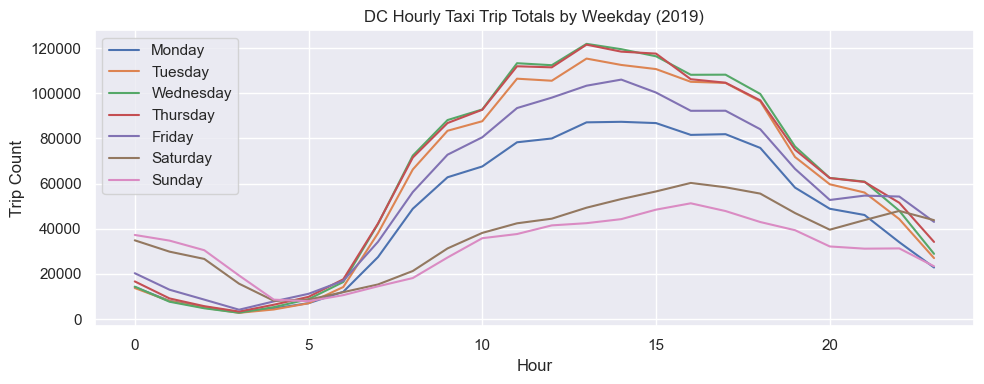

In [39]:
# plot line graph with hourly trip totals grouped by weekday
fig, ax = plt.subplots(figsize=(10, 4))

sorted_table.plot(ax=ax).set_title(
    'DC Hourly Taxi Trip Totals by Weekday (2019)')

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

# provide column name aliases
l = plt.legend()
l.get_texts()[0].set_text('Monday')
l.get_texts()[1].set_text('Tuesday')
l.get_texts()[2].set_text('Wednesday')
l.get_texts()[3].set_text('Thursday')
l.get_texts()[4].set_text('Friday')
l.get_texts()[5].set_text('Saturday')
l.get_texts()[6].set_text('Sunday')

plt.tight_layout()

In [48]:
# remove outliers
trip_speed = taxi_trips[
    (taxi_trips["DURATION"] >= 30.0)
    & (taxi_trips["MILEAGE"] < 90)
    & (taxi_trips["MILEAGE"] != 0)
]
# calculate average trip speed
trip_speed["avg_speed"] = (trip_speed["MILEAGE"] / trip_speed["DURATION"]) * 60 * 60

trip_speed

C:\Users\Guest.Guest\AppData\Local\Temp\ipykernel_548\450033013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_speed["avg_speed"] = (trip_speed["MILEAGE"] / trip_speed["DURATION"]) * 60 * 60


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,month,pickup_est,hour,weekday_name,weekday_num,avg_speed
0,48252809,15.94,20006,22202,5.19,879,38.900213,-77.040574,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1,21.255973
1,48252810,73.45,20007,20152,31.43,2735,38.907217,-77.063241,01/01/2019 15:00,01/01/2019 16:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1,41.370384
2,48252811,6.49,20037,20007,1.23,363,38.909637,-77.047716,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1,12.198347
3,48252812,17.29,20009,22202,6.13,946,38.920843,-77.031850,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1,23.327696
5,48252814,22.96,20020,20020,6.02,31,38.868846,-76.983672,01/01/2019 15:00,01/01/2019 15:00,2019-01-01 15:00:00,1,2019-01-01 10:00:00-05:00,10,Tuesday,1,699.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574387,574388,14.05,20005,20003,3.88,980,38.905699,-77.032094,12/31/2019 23:00,12/31/2019 23:00,2019-12-31 23:00:00,12,2019-12-31 18:00:00-05:00,18,Tuesday,1,14.253061
574388,574389,17.02,20002,20007,4.59,1461,38.896881,-77.006479,12/31/2019 23:00,12/31/2019 23:00,2019-12-31 23:00:00,12,2019-12-31 18:00:00-05:00,18,Tuesday,1,11.310062
574391,574392,5.14,20036,20009,0.63,235,38.910018,-77.044528,12/31/2019 23:00,12/31/2019 23:00,2019-12-31 23:00:00,12,2019-12-31 18:00:00-05:00,18,Tuesday,1,9.651064
574393,574394,7.84,20427,20007,0.97,588,38.901699,-77.047744,12/31/2019 23:00,12/31/2019 23:00,2019-12-31 23:00:00,12,2019-12-31 18:00:00-05:00,18,Tuesday,1,5.938776


In [49]:
taxi_trips_avg = trip_speed.groupby(['hour'])['avg_speed'].mean() \
    .reset_index() \
    .rename(columns={'avg_speed':'avg_hourly_speed'})

taxi_trips_avg

,hour,avg_hourly_speed
0,0,38.731590
1,1,35.430703
2,2,35.986031
3,3,52.418470
4,4,76.276664
5,5,96.036302
6,6,70.458334
7,7,43.795972
8,8,32.597023
9,9,32.420465
